In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import library machine Learning
import nltk 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import gensim
from wordcloud import WordCloud
import re
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# download resource NLTK only once installed
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

In [12]:
# load the dataset

df = pd.read_csv('datasets/dataset.csv')

display(df.head(20))


,video_id,title,channel_name,tanggal,author,komentar,label,komentar_clean,predicted_label
0,f8UEkmYXlzA,SKAKMAT AHOK,Pandji Pragiwaksono,1.745.412.234.123.970,TerranceNoelle-o9i,Makin yakin abis baca review lain tentang ✌✌𝐒𝐆...,1,makin yakin abis baca review lain tentang 𝐒𝐆𝐈𝟖𝟖 .,0
1,XI8K0-_kbHc,GAK NYANGKA BISA BEGINI! PENGENDARA DIJALAN SA...,Jejelogy,1.739.601.493.342.000,deraatvexplorerriders.2113,Paling suka model H2 😍🔥,0,suka model h2,0
2,nZoNbiwP2ZE,Akhirnya Selesai Subaru Crosstrek Family Drift...,Garasi Drift,1.739.772.479.808.090,risqokurniadi7208,Mobilnya udah hancur 🥺,0,mobilnya udah hancur,0
3,QpXcKzQInXg,Review Mobil Drift Seharga Super Car | BRZ V8 ...,Garasi Drift,1.738.825.556.100.780,LorrianeDotson,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin aku jadi sultan,1,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin sultan,1
4,nZoNbiwP2ZE,Akhirnya Selesai Subaru Crosstrek Family Drift...,Garasi Drift,1.739.858.865.953.920,Elpoco7365,Semoga lekas recover mobilnya mas Dipo,0,semoga lekas recover mobilnya mas dipo,0
5,gRjWM8jPIPw,"MR. BOND, MOBIL ANDA SUDAH SIAP | ASTON MARTIN...",Fitra Eri,2025-04-30 09:01:02+00:00,ReshmaBanu-ml2cn,pantes tongkrongan maen alexis17,1,pantes tongkrongan maen alexis17,1
6,4-hj6CwvKpU,JAECOO J7 | PHEV Apakah Worth It? Feat. Ridwan...,Motomobi,1.745.164.793.426.260,WulanSantoso-e4n,gua udah ga bisa bayangin hidup tanpa ALEXIS-1...,1,gua udah ga bisa bayangin hidup tanpa alexis-1...,1
7,rrUoGtfU9kw,PAMERAN EV TERKEREN INI BISA BIKIN ANDA KAYA RAYA,Fitra Eri,2025-05-01 09:01:12+00:00,Boruulqi,langsung percaya lihat hasilnya,1,langsung percaya lihat hasilnya,1
8,VXqMJqP7mvk,HP TERGILA yang dijual RESMI di INDONESIA! - H...,GadgetIn,2025-04-22 03:10:19+00:00,SitiSeptiani-m4o,orang bilang alexis17 tuh miracle banget !,1,orang bilang alexis17 tuh miracle banget !,1
9,gP0YCMCJnjA,Presiden Prabowo Menjawab,Narasi Newsroom,1.744.214.326.412.990,urutoito,Yapping mulu anjir kagak ada jawaban sistemati...,0,yapping mulu anjir kagak ada jawaban sistemati...,0


In [5]:
missing_values = df.isnull().sum()
print("Amount of duplicates column")
print(missing_values)
print("\n")

duplicate_rows = df.duplicated().sum()
print(f"Amount Rows has duplicates: {duplicate_rows} Rows\n")

if duplicate_rows > 0:
    print("Example column duplicate:")
    print(df[df.duplicated(keep=False)]) 
print("\n")


Amount of duplicates column
video_id           0
title              0
channel_name       0
tanggal            0
author             0
komentar           0
label              0
komentar_clean     0
predicted_label    0
dtype: int64


Amount Rows has duplicates: 0 Rows





In [21]:
import unicodedata
import re
import pandas as pd

def smart_cleaning(text):
    text = str(text)
    # Normalisasi Unicode (Ubah font aneh jadi huruf standar)
    text = unicodedata.normalize('NFKD', text)
    # Hapus sisa karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Lowercase
    text = text.lower()
    # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Hapus Mention & Hashtag
    text = re.sub(r'@\w+|#\w+', '', text)
    # Hapus Tanda Baca (Tapi pertahankan angka & huruf)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Hapus Spasi Berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['komentar_smart_clean'] = df['komentar'].apply(smart_cleaning)

keywords_judol = ['manut', '88', 'gacor', 'slot', 'link', 'situs', 'depo', 'maxwin', 'jp']

is_judol = df['komentar'].str.lower().apply(lambda x: any(k in x for k in keywords_judol))

df_compare = df[is_judol][['komentar', 'komentar_clean', 'komentar_smart_clean']].head(30)

print(f"\nMenampilkan {len(df_compare)} data sampel Judol:")
pd.set_option('display.max_colwidth', None) 
display(df_compare)


Menampilkan 30 data sampel Judol:


,komentar,komentar_clean,komentar_smart_clean
3,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin aku jadi sultan,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin sultan,manut88benar2 bikin aku jadi sultan
39,"Bangun tidur ku terus ngeslt, emang paten kali mandalika77 nih belum apa2 udah maxwin dia, kirain cuma dalam mimpi doang bisa dapat maxwin.","bangun tidur ku ngeslt , emang paten kali mandalika77 nih apa2 udah maxwin , kirain mimpi doang maxwin .",bangun tidur ku terus ngeslt emang paten kali mandalika77 nih belum apa2 udah maxwin dia kirain cuma dalam mimpi doang bisa dapat maxwin
42,dikasi jp pas modal haha makasi𝐏 𝐋 𝐔 𝐓 𝐎 𝟖 𝟖,dikasi jp pas modal haha makasi𝐏 𝐋 𝐔 𝐓 𝐎 𝟖 𝟖,dikasi jp pas modal haha makasip l u t o 8 8
62,keren . gas mari kak weton88,keren . gas mari kak weton88,keren gas mari kak weton88
66,nice link bagus mandalika77,nice link bagus mandalika77,nice link bagus mandalika77
77,"★Mandalika77★ mekswin, depoin LIMPUL","★mandalika77★ mekswin , depoin limpul",mandalika77 mekswin depoin limpul
110,"gue udah coba main jam-jam , alexis17 , emang gacor jam 1 pagi","gue udah coba main jam-jam , alexis17 , emang gacor jam 1 pagi",gue udah coba main jamjam alexis17 emang gacor jam 1 pagi
111,"bro sibuk sih ? alexis17 , bagi-bagi bonus deposit super gede nih","bro sibuk sih ? alexis17 , bagi-bagi bonus deposit super gede nih",bro sibuk sih alexis17 bagibagi bonus deposit super gede nih
132,ges doain ya gw coba stop maengaruda-ho ki kecanduan bgt gacor nya gw,ges doain ya gw coba stop maengaruda-ho ki kecanduan bgt gacor nya gw,ges doain ya gw coba stop maengarudaho ki kecanduan bgt gacor nya gw
164,"nggak diragukan , slot gacor . 𝗣 𝗟 𝗨 𝗧 𝗢 𝟴 𝟴","nggak diragukan , slot gacor . 𝗣 𝗟 𝗨 𝗧 𝗢 𝟴 𝟴",nggak diragukan slot gacor p l u t o 8 8


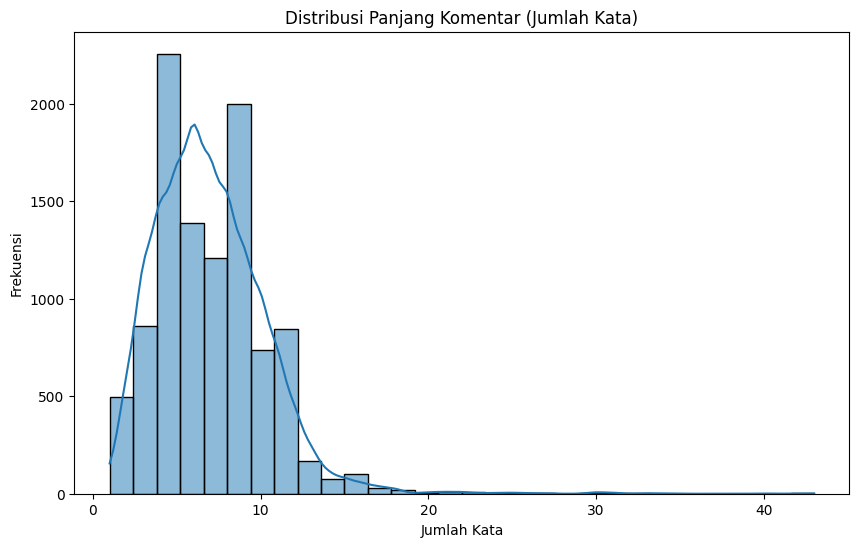

In [7]:
# checking outliers

df['panjang_komentar'] = df['komentar'].dropna().str.split().str.len() #make sure column komentar dosent have Nan

# visualization for checking outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['panjang_komentar'], bins=30, kde=True)
plt.title('Distribusi Panjang Komentar (Jumlah Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

Proceed EDA

--- Analysis Distribution Label ---


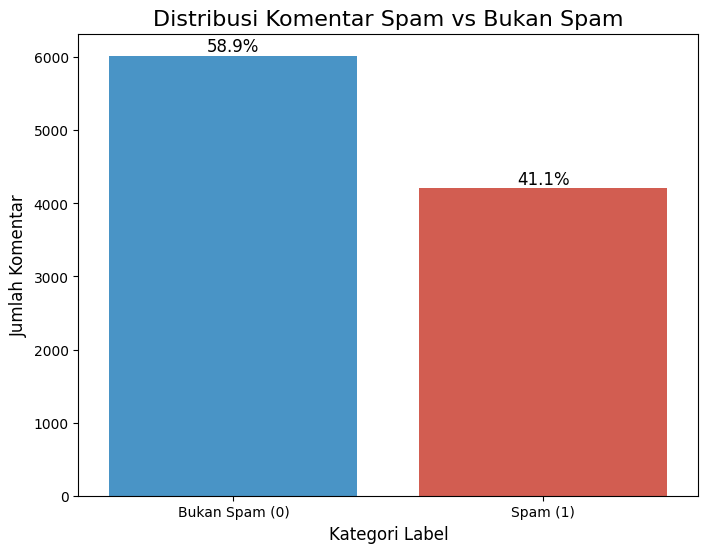


--- Menganalisis Kata Kunci (Word Cloud & Frekuensi N-gram) ---


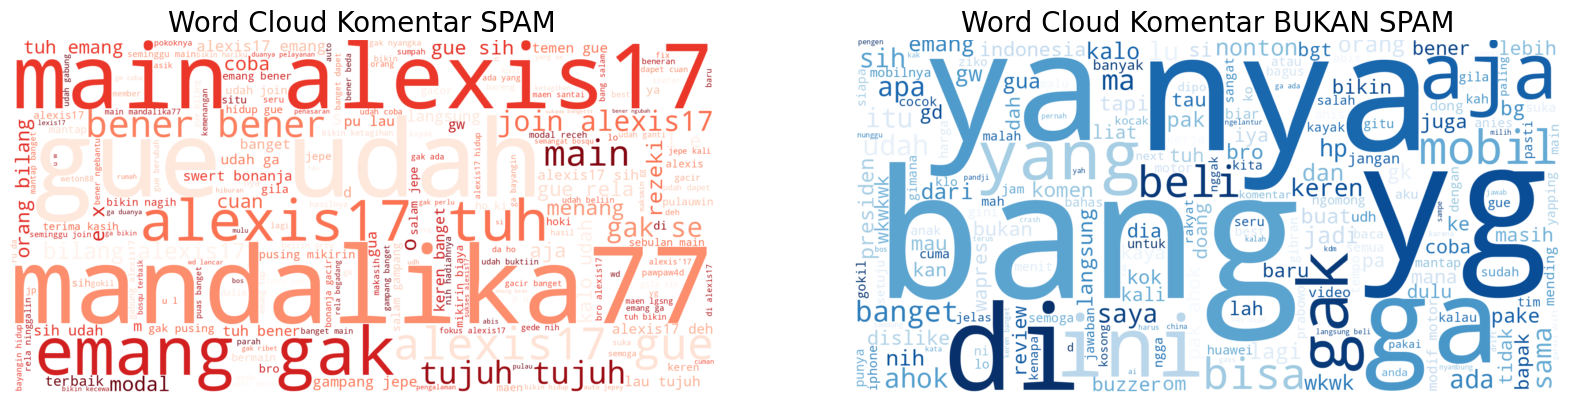

/tmp/ipykernel_10323/3203553146.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=df_spam_bigrams, palette='viridis')


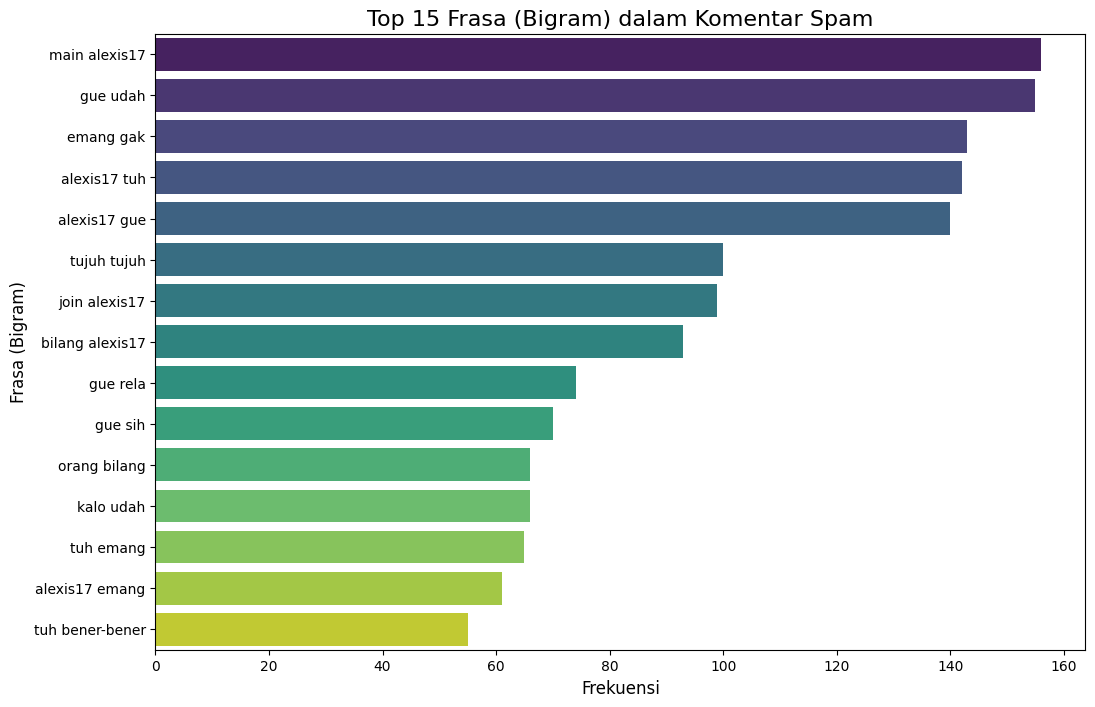


Proses EDA selesai.


In [8]:
print("Proceed EDA")
print("\n--- Analysis Distribution Label ---")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=df, hue='label', palette=['#3498db', '#e74c3c'], legend=False)

plt.title('Distribusi Komentar Spam vs Bukan Spam', fontsize=16)
plt.xlabel('Kategori Label', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks([0, 1], ['Bukan Spam (0)', 'Spam (1)'], fontsize=10)

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()


print("\n--- Menganalisis Kata Kunci (Word Cloud & Frekuensi N-gram) ---")

df['komentar_clean'] = df['komentar_clean'].astype(str) 
spam_comments_df = df[df['label'] == 1]
non_spam_comments_df = df[df['label'] == 0]

spam_text = " ".join(comment for comment in spam_comments_df.komentar_clean)
non_spam_text = " ".join(comment for comment in non_spam_comments_df.komentar_clean)

if spam_text and non_spam_text:
    wordcloud_spam = WordCloud(width=1600, height=800, background_color='white', colormap='Reds').generate(spam_text)
    wordcloud_non_spam = WordCloud(width=1600, height=800, background_color='white', colormap='Blues').generate(non_spam_text)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    axes[0].imshow(wordcloud_spam, interpolation='bilinear')
    axes[0].set_title('Word Cloud Komentar SPAM', fontsize=20)
    axes[0].axis('off')

    axes[1].imshow(wordcloud_non_spam, interpolation='bilinear')
    axes[1].set_title('Word Cloud Komentar BUKAN SPAM', fontsize=20)
    axes[1].axis('off')

    plt.show()
else:
    print("Tidak cukup data untuk membuat Word Cloud.")

def get_top_ngrams(corpus, n=None, gram=2):
    """Fungsi untuk mendapatkan n-gram paling umum dari sebuah teks."""
    words = [word for word in re.split(r'\s+', corpus) if len(word) > 2 and not word.isdigit()]
    ngrams = zip(*[words[i:] for i in range(gram)])
    ngram_counts = Counter([" ".join(ngram) for ngram in ngrams])
    return ngram_counts.most_common(n)

top_spam_bigrams = get_top_ngrams(spam_text, n=15, gram=2)

if top_spam_bigrams:
    df_spam_bigrams = pd.DataFrame(top_spam_bigrams, columns=['bigram', 'count'])

    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='bigram', data=df_spam_bigrams, palette='viridis')
    plt.title('Top 15 Frasa (Bigram) dalam Komentar Spam', fontsize=16)
    plt.xlabel('Frekuensi', fontsize=12)
    plt.ylabel('Frasa (Bigram)', fontsize=12)
    plt.show()
else:
    print("Tidak cukup data untuk analisis N-gram pada komentar spam.")

print("\nProses EDA selesai.")

# MODELING 1 Naive Bayes + unigram (TF-IDF)

Data siap! Training: 8184 baris, Testing: 2046 baris.

Accuracy: 95.01%

Detail:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1168
           1       0.94      0.95      0.94       878

    accuracy                           0.95      2046
   macro avg       0.95      0.95      0.95      2046
weighted avg       0.95      0.95      0.95      2046



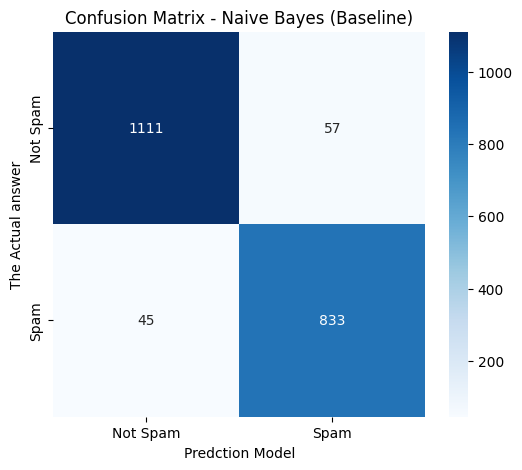

In [34]:
x = df['komentar_smart_clean']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Data siap! Training: {len(X_train)} baris, Testing: {len(X_test)} baris.\n")

model_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Defaultnya udah Unigram (ngram_range=(1,1))
    ('algo', MultinomialNB())      # Algoritma Naive Bayes
])

model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nDetail:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predction Model')
plt.ylabel('The Actual answer')
plt.title('Confusion Matrix - Naive Bayes (Baseline)')
plt.show()

# Model 2 Naive Bayes + TF IDF  (Bigram)

Training Model (machine learning in progress)
while testing model
Accuracy: 94.09%

Detail:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1168
           1       0.95      0.91      0.93       878

    accuracy                           0.94      2046
   macro avg       0.94      0.94      0.94      2046
weighted avg       0.94      0.94      0.94      2046



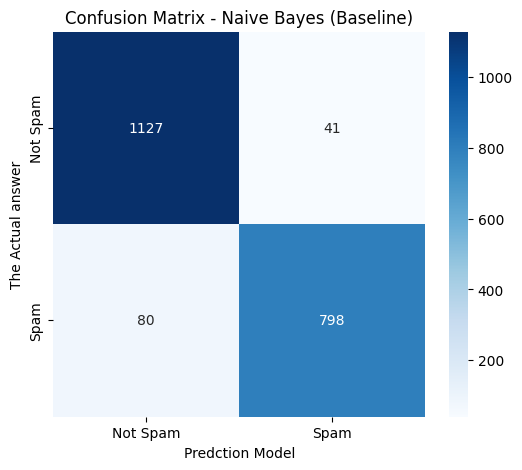

In [19]:
model_nb_bigram = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(2,2))), 
    ('algo', MultinomialNB())      # Algorithm Naive Bayes
])

#Training data
print("Training Model (machine learning in progress)")
model_nb_bigram.fit(X_train, y_train)

#Testing 
print("while testing model")
y_pred_bigram = model_nb_bigram.predict(X_test)


# Evaluation 
acc_bigram = accuracy_score(y_test, y_pred_bigram)
print(f"Accuracy: {acc_bigram * 100:.2f}%")
print("\nDetail:")
print(classification_report(y_test, y_pred_bigram))

# VISUALISASI CONFUSION MATRIX 
plt.figure(figsize=(6, 5))
cm_bigram = confusion_matrix(y_test, y_pred_bigram)
sns.heatmap(cm_bigram, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predction Model')
plt.ylabel('The Actual answer')
plt.title('Confusion Matrix - Naive Bayes (Baseline)')
plt.show()




Accuracy Trigram: 88.61%

 Detail:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1168
           1       0.99      0.74      0.85       878

    accuracy                           0.89      2046
   macro avg       0.91      0.87      0.88      2046
weighted avg       0.90      0.89      0.88      2046



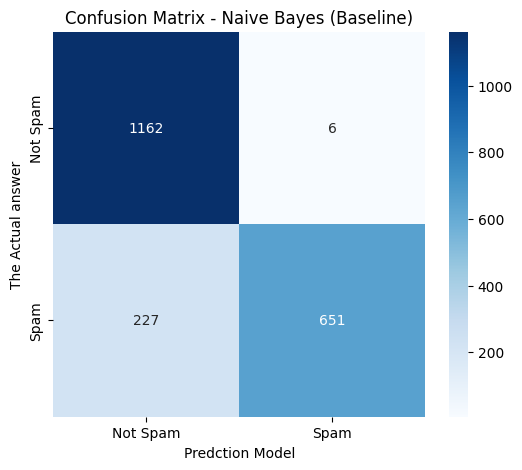

In [35]:


model_nb_trigram = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(3,3))), 
    ('algo', MultinomialNB())
])

model_nb_trigram.fit(X_train, y_train)

y_pred_trigram = model_nb_trigram.predict(X_test)

acc_trigram = accuracy_score(y_test, y_pred_trigram)
print(f"Accuracy Trigram: {acc_trigram * 100:.2f}%")
print("\n Detail:")
print(classification_report(y_test, y_pred_trigram))

plt.figure(figsize=(6, 5))
cm_trigram = confusion_matrix(y_test, y_pred_trigram)
sns.heatmap(cm_trigram, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predction Model')
plt.ylabel('The Actual answer')
plt.title('Confusion Matrix - Naive Bayes (Baseline)')
plt.show()


 Final Classmen Scenario N-GRAM 
--------------------------------------------------
1. Unigram  : 95.01%
2. Bigram : 94.09%
3. Trigram : 88.61%
--------------------------------------------------


/tmp/ipykernel_10323/4150939826.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Akurasi', data=results, palette='viridis')


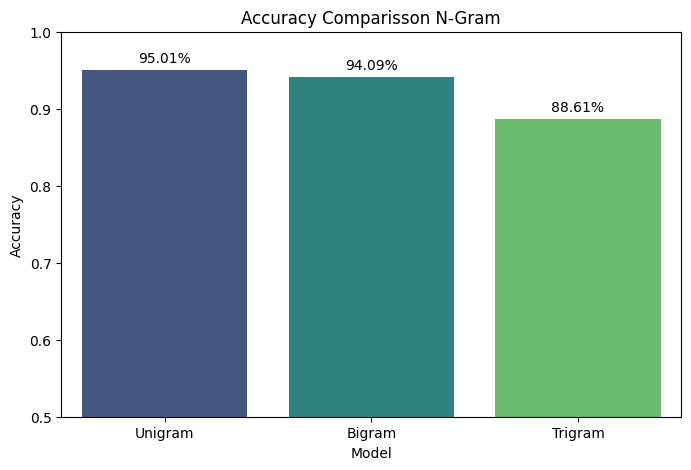

In [ ]:

print("\n Final Classmen Scenario N-GRAM ")
print("-" * 50)
print(f"1. Unigram  : {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"2. Bigram : {acc_bigram * 100:.2f}%")
print(f"3. Trigram : {acc_trigram * 100:.2f}%")
print("-" * 50)

# Visualisasi Grafik
results = pd.DataFrame({
    'Model': ['Unigram', 'Bigram', 'Trigram'],
    'Akurasi': [accuracy_score(y_test, y_pred), acc_bigram, acc_trigram]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Akurasi', data=results, palette='viridis')
plt.ylim(0.5, 1.0) 
plt.title('Accuracy Comparisson N-Gram')
plt.ylabel('Accuracy')
for index, row in results.iterrows():
    plt.text(index, row.Akurasi + 0.01, f"{row.Akurasi*100:.2f}%", color='black', ha="center")
plt.show()